In [2]:
seq = get_standardized_measures('results/sequential_10.csv')
seq_time_tot = seq['TOTAL'].mean()

In [3]:
data = get_standardized_measures('results/thr_10.csv', excluded_columns=['P_DEGREE'])

In [4]:
data

,P_DEGREE,READ,HUFFBUILD,MAP,TRANSFORM,WRITING,TOTAL
0,1,1170108771,68047,705587170,890939984,15985757,2782689729
1,1,1167040055,69423,707970072,892476097,3258922,2770814569
2,1,1160089530,67856,694995171,884632424,5239925,2745024906
3,1,1164997924,69189,697172587,892897568,16609680,2771746948
4,1,1167034870,69239,693181344,886833098,16087970,2763206521
...,...,...,...,...,...,...,...
95,20,90150498,71084,89328940,74210828,3500679,257262029
96,20,90500083,68176,89659477,74667472,3431081,258326289
97,20,89370725,64938,97746303,75538828,3719454,266440248
98,20,89846573,64883,90608538,74633463,3323893,258477350


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

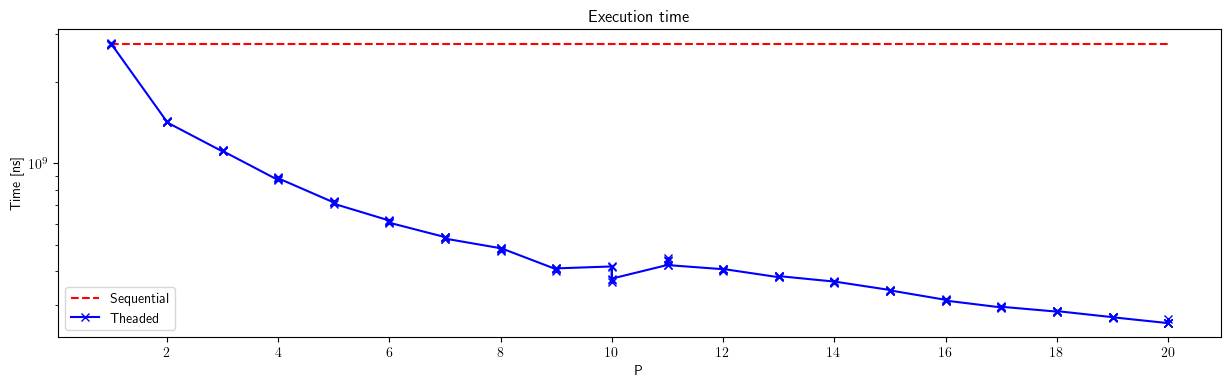

In [6]:
# setting up the plot
plt.figure(figsize=(15,4))
plt.title('Execution time')
plt.xticks(range(0, len(data['P_DEGREE']), 2))
plt.xlabel("P")
plt.ylabel("Time [ns]")
plt.yscale('log')
# sequential
plt.plot(data['P_DEGREE'], [seq_time_tot for _ in range(len(data['P_DEGREE']))], '--r')
# parallel
plt.plot(data['P_DEGREE'], data['TOTAL'], 'x-b')

plt.legend(['Sequential', 'Theaded'])
plt.show()

# Outlier detection and mean

Here we remove the outliers for the data and we compute the mean

In [7]:
import pandas as pd

In [8]:
# compute the mean for each group
sp_data = data.groupby('P_DEGREE', as_index=False).mean()

In [9]:
sp_data

,P_DEGREE,READ,HUFFBUILD,MAP,TRANSFORM,WRITING,TOTAL
0,1,1.165854e+09,68750.8,699781268.8,889555834.2,11436450.8,2.766697e+09
1,2,5.973949e+08,67839.0,362642960.8,458600857.6,6094821.8,1.424801e+09
2,3,4.093124e+08,70550.2,385409148.2,315659143.4,3444046.6,1.113895e+09
3,4,3.112709e+08,72613.8,323779699.8,238878543.6,5765509.4,8.797673e+08
4,5,2.509024e+08,71311.6,271023030.8,193085028.0,3537771.8,7.186195e+08
5,6,2.090893e+08,70551.8,236629369.2,162084240.2,3542568.2,6.114160e+08
6,7,1.804544e+08,70613.4,208004150.4,139220941.0,3516012.6,5.312662e+08
7,8,1.577631e+08,69079.4,199235730.6,122338073.4,3535163.0,4.829412e+08
8,9,1.404848e+08,65962.8,154002297.2,109032881.0,3535701.8,4.071217e+08
9,10,1.365364e+08,67316.8,141073723.4,107462674.0,3387326.6,3.885274e+08


# Speedup

Let's calculate the speedup $\frac{T_{seq}}{T(P)}$

In [10]:
sp_data['S_p'] = sp_data['TOTAL'].map(lambda x: seq_time_tot / x)

In [11]:
sp_data

,P_DEGREE,READ,HUFFBUILD,MAP,TRANSFORM,WRITING,TOTAL,S_p
0,1,1.165854e+09,68750.8,699781268.8,889555834.2,11436450.8,2.766697e+09,0.998342
1,2,5.973949e+08,67839.0,362642960.8,458600857.6,6094821.8,1.424801e+09,1.938593
2,3,4.093124e+08,70550.2,385409148.2,315659143.4,3444046.6,1.113895e+09,2.479686
3,4,3.112709e+08,72613.8,323779699.8,238878543.6,5765509.4,8.797673e+08,3.139592
4,5,2.509024e+08,71311.6,271023030.8,193085028.0,3537771.8,7.186195e+08,3.843634
5,6,2.090893e+08,70551.8,236629369.2,162084240.2,3542568.2,6.114160e+08,4.517563
6,7,1.804544e+08,70613.4,208004150.4,139220941.0,3516012.6,5.312662e+08,5.199108
7,8,1.577631e+08,69079.4,199235730.6,122338073.4,3535163.0,4.829412e+08,5.719351
8,9,1.404848e+08,65962.8,154002297.2,109032881.0,3535701.8,4.071217e+08,6.784483
9,10,1.365364e+08,67316.8,141073723.4,107462674.0,3387326.6,3.885274e+08,7.109177


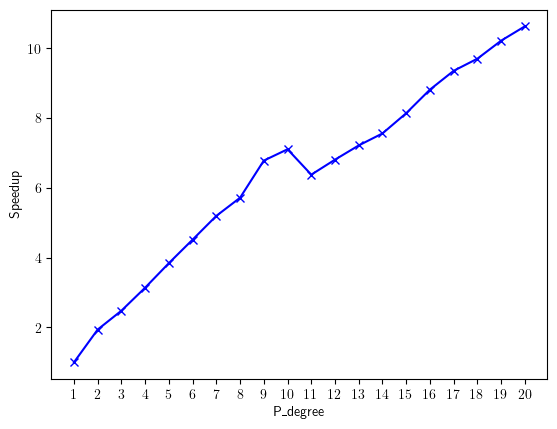

In [12]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Speedup')

plt.plot(sp_data['P_DEGREE'], sp_data['S_p'], 'x-b')

# Scalability

Compute the scalability that is $S_n=\frac{T(1)}{T(N)}$

In [13]:
time_n0 = sp_data[sp_data['P_DEGREE'] == 1]['TOTAL']
time_n0

0    2.766697e+09
Name: TOTAL, dtype: float64

In [14]:
sp_data['S_c'] = sp_data['TOTAL'].map(lambda x: time_n0 / x)

/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return math.isfinite(val)
/home/federicosilvestri/CLionProjects/spm-project/benchmark_workspace/venv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return np.asarray(x, float)


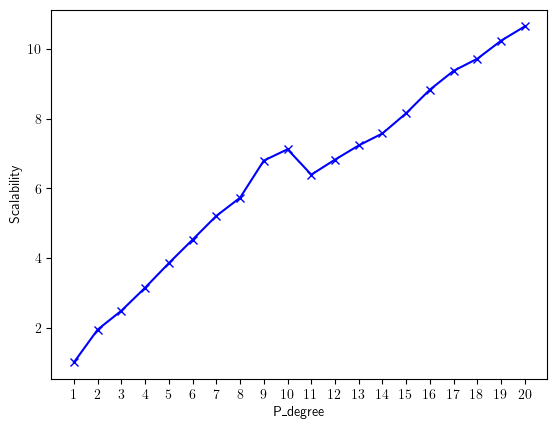

In [15]:
# plot results
plt.xticks(sp_data['P_DEGREE'])
plt.xlabel('P_{degree}')
plt.ylabel('Scalability')

plt.plot(sp_data['P_DEGREE'], sp_data['S_c'], 'x-b')